<a href="https://colab.research.google.com/github/RheedWhan/Music-Genre-Classification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

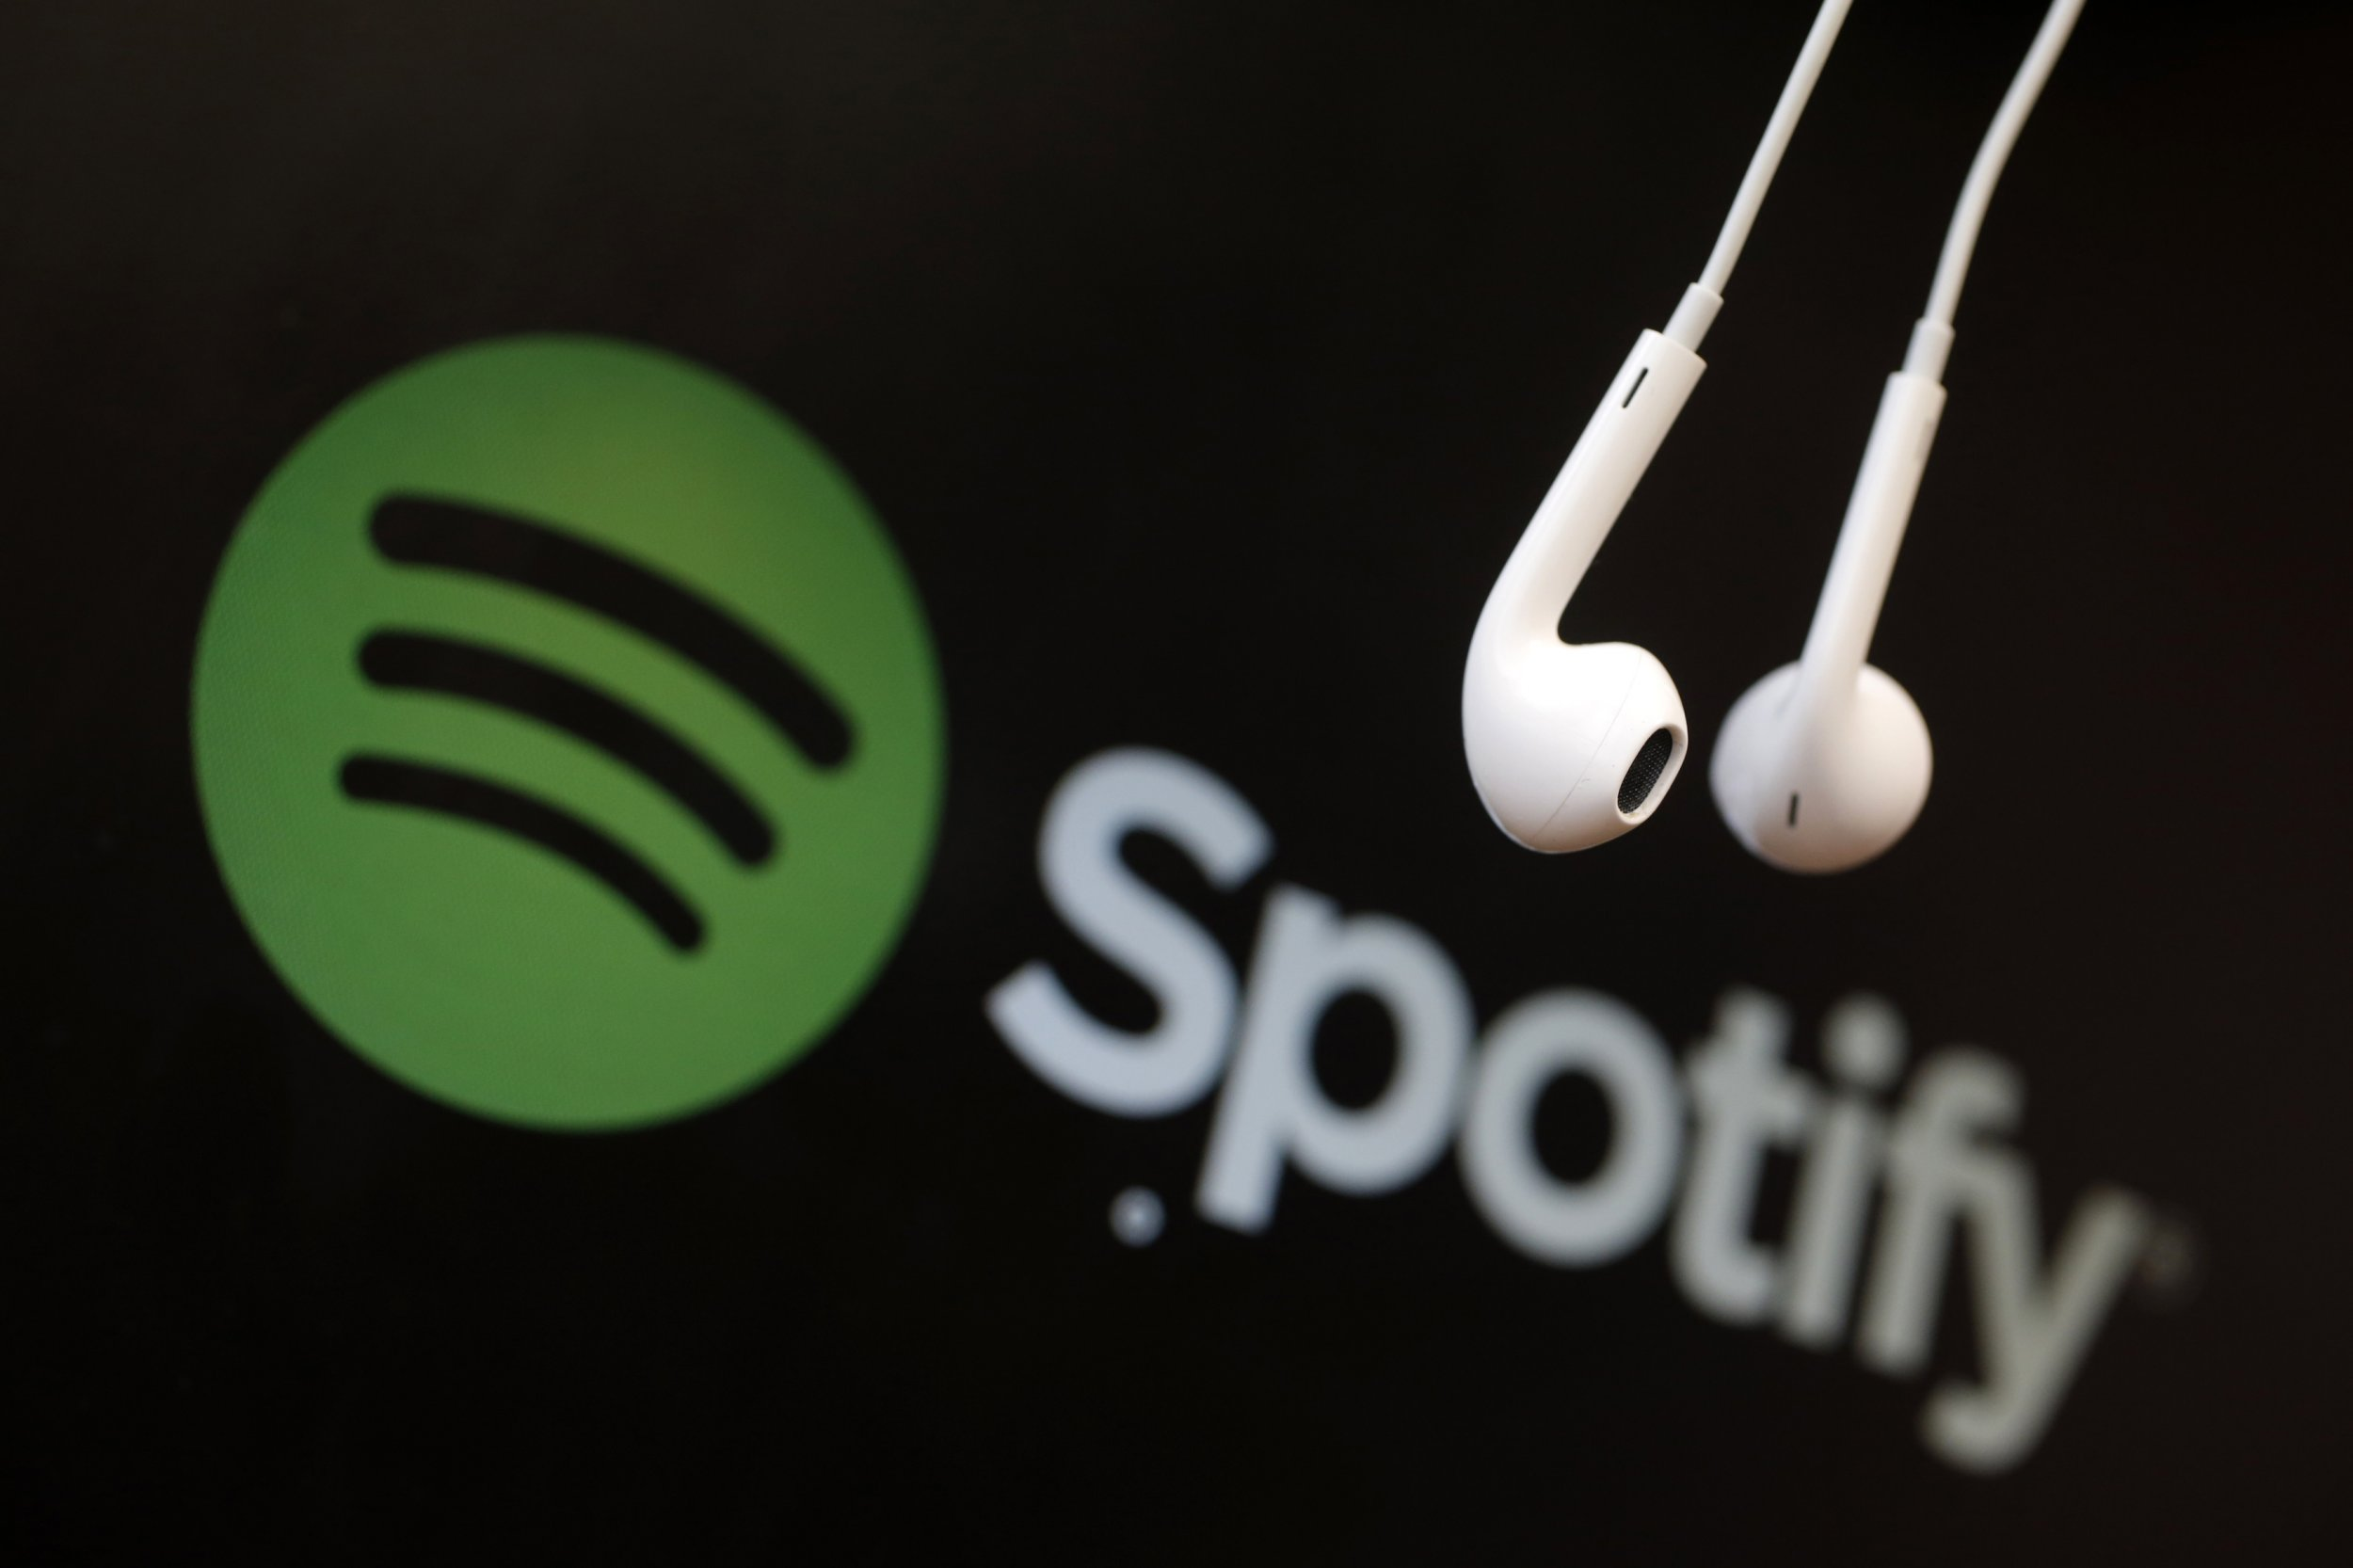


This dataset provides comprehensive information about Spotify tracks, covering a wide range of 125 genres. The data has been collected and cleaned using Spotify's Web API and Python, and it is presented in CSV format for easy access and analysis. The dataset includes various columns, each representing specific audio features associated with individual tracks.

These columns encompass details such as artists (the name of the artist or artists performing the track), album_name (the title of the album to which the track belongs), track_name (the specific name of each track), popularity (a numerical score indicating the song's popularity on Spotify), duration_ms (the duration of each track in milliseconds), and explicit (a boolean value indicating whether a song contains explicit content).

In addition to these, there are several audio features providing in-depth insights into the musical characteristics of each track. These features cover danceability, energy, key, loudness, mode, speechiness (indicating the presence of spoken words in a song), acousticness (measuring the inclination towards acoustic sounds), instrumentalness (indicating the likelihood of a song being instrumental), and more.

The dataset also includes attributes like liveness (reflecting the presence of live audience elements), valence (quantifying musical positiveness), tempo (beats per minute), and time_signature (revealing details about bar structures).

This dataset is valuable for users interested in discerning patterns across multiple genres and for those looking to predict genres based on perceptible audio nuances using machine learning models. Whether you're an audiophile, music enthusiast, or data scientist, this repository provides a rich resource for research, allowing for extensive exploration into genre dynamics and understanding the nuanced relationships between various musical attributes found in Spotify tracks.

**Knowing the Data**


- **Artists:** The name(s) of the artist(s) associated with the track. (String)

- **Album_name:**	The name of the album that the track belongs to. (String)
- **Track_name:**	The name of the track. (String)
- **Popularity:**	The popularity score of the track on Spotify, ranging from 0 to 100. (Integer)
- **Duration_ms:**	The duration of the track in milliseconds. (Integer)
- **Explicit:**	A boolean value indicating whether the track contains explicit content. (Boolean)
- **Danceability:**	A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements. (Float)
- **Energy:**	A measure of the intensity and activity of a track, ranging from 0 to 1. (Float)
- **Key:**	The key of the track represented by an integer value. (Integer)
- **Loudness:**	The loudness of the track in decibels (dB). (Float)
- **Mode:**	The tonal mode of the track, represented by an integer value (0 for minor, 1 for major). (Integer)
- **Speechiness:**	A score ranging from 0 to 1 that represents the presence of spoken words in a track. (Float)
- **Acousticness:**	A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality. (Float)
- **Instrumentalness:**	A score ranging from 0 to 1 that represents the likelihood of a track being instrumental. (Float)
- **Liveness:**	A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance of a track. (Float)
- **Valence:**	A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track. (Float)
- **Tempo:**	The tempo of the track in beats per minute (BPM). (Float)
- **Time_signature:**	The number of beats within each bar of the track. (Integer)
- **Track_genre:**	The genre of the track. (String)

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df_full= pd.read_csv('/content/mgc dataset.csv') # Import the data
df_full.head() # Print the first 5 rows

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Exploratory Data Analysis

In [ ]:
df = df_full # Duplicate dataset

In [ ]:
df.shape # number of columns and rows

(114000, 21)

In [ ]:
df.info() # Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.isna().sum() # Check the missing values

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

There are 3 different missing values in three different columns

In [ ]:
df.dropna(inplace=True) # Drop the missing values

In [ ]:
df.isna().sum() # Check the missing values again

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
# Dropping columns we don't want that in our training.
columns_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'explicit']

# Use the drop function to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.track_genre.nunique() # Check the number of unique values in that column

114

In [ ]:
df.describe() # Summary of the data

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


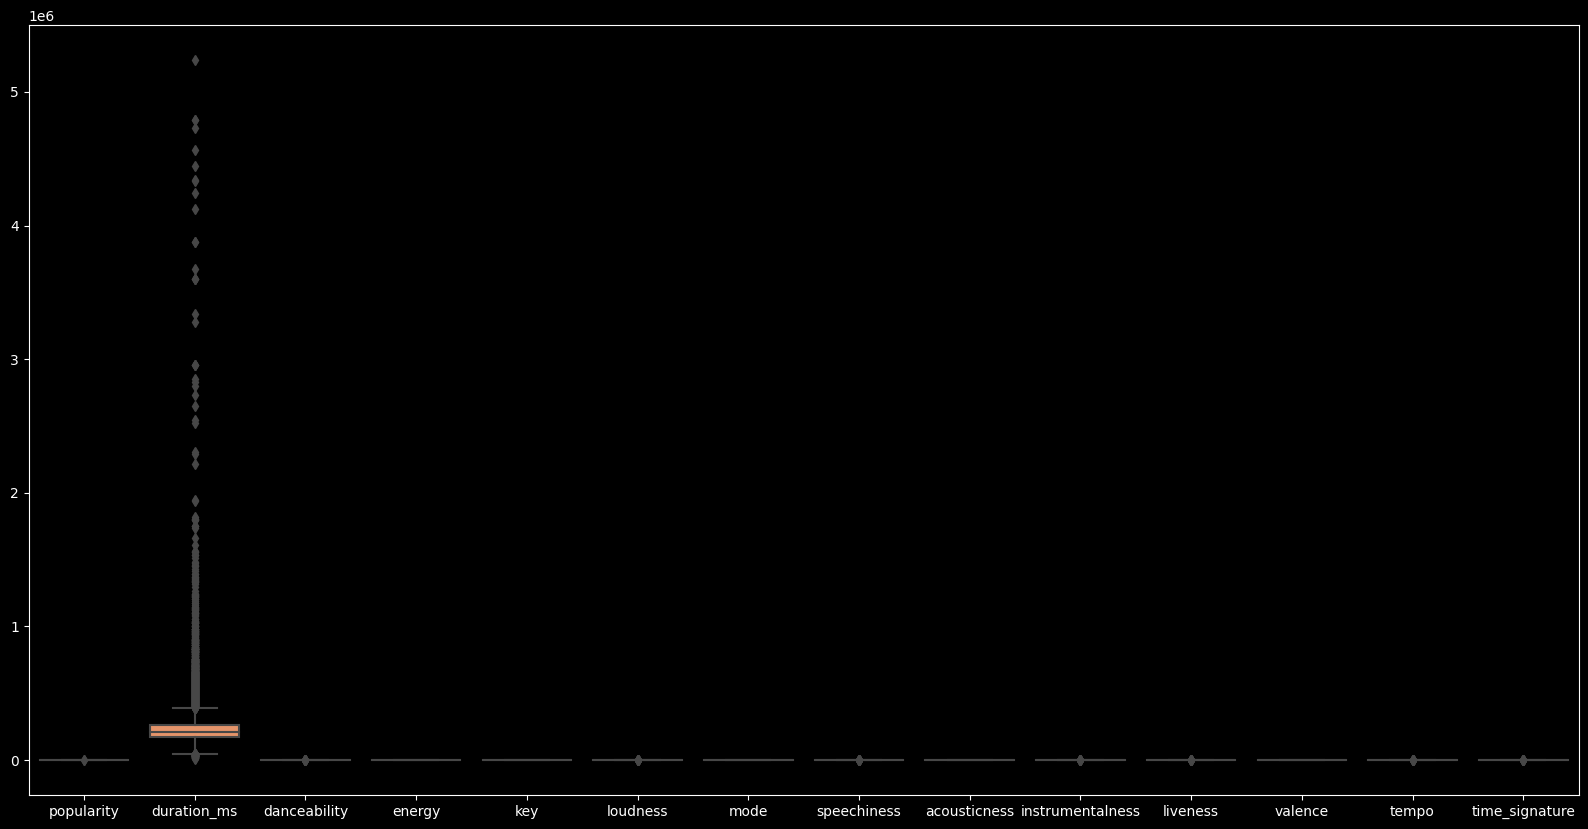

In [ ]:
# Visualize the dataset with boxplot to see the outliers
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

There are some outliers in the 'duration_ms' column

In [ ]:
df.corr() # Check the correlation of the data

<ipython-input-14-511847b17904>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Check the correlation of the data


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
danceability,0.035444,-0.073435,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142
instrumentalness,-0.095147,0.124364,-0.185608,-0.181880,-0.006821,-0.433478,-0.049961,-0.089617,0.104033,1.000000,-0.079896,-0.324310,-0.050328,-0.082580


<ipython-input-15-cdcda1092106>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

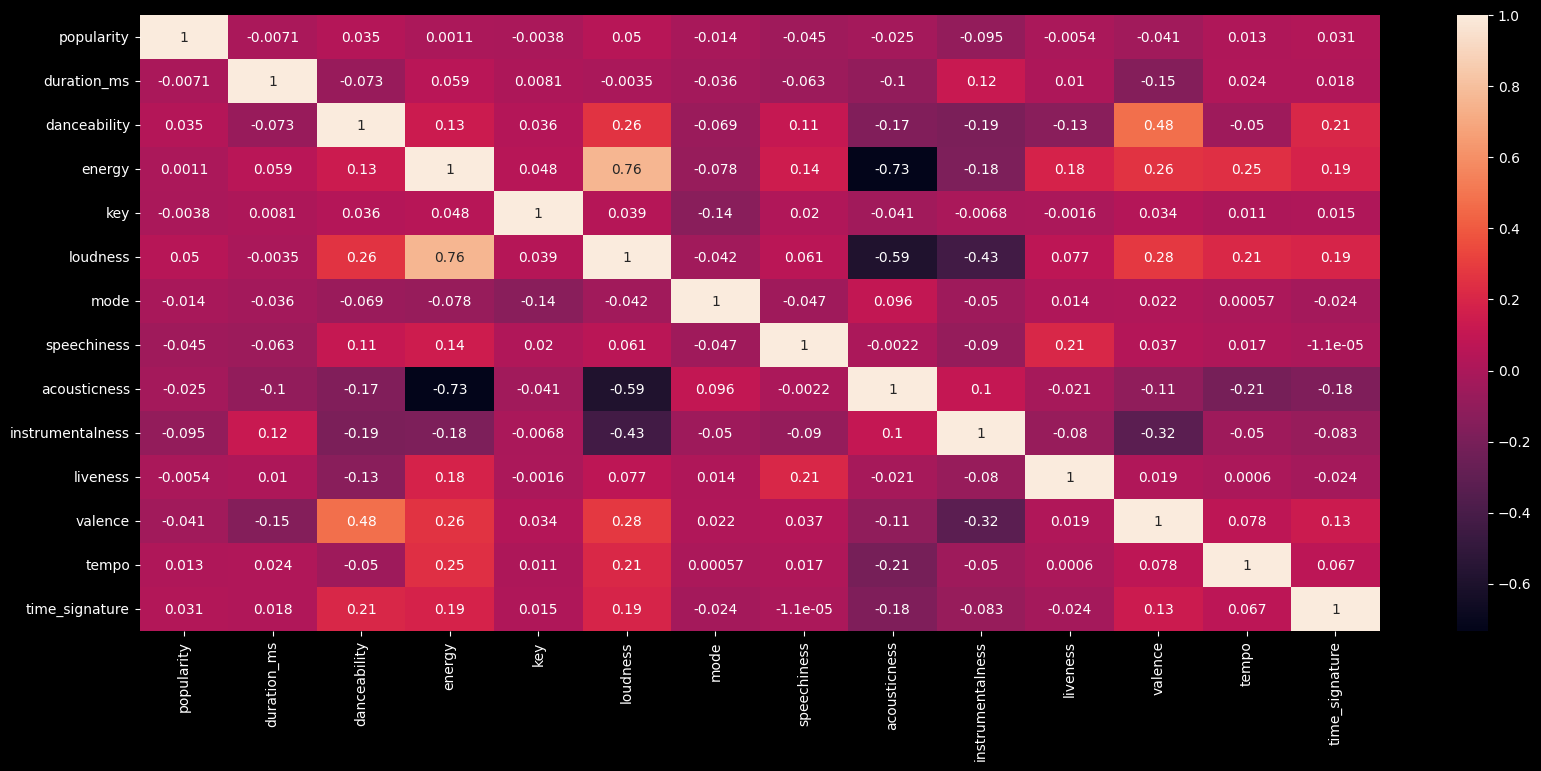

In [ ]:
# Visualize the correlation with heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)

Loudness and energy are strongly correlated positively while acousticness and energy are strongly correlated negatively

In [ ]:
df.track_genre.nunique()

114

In [ ]:
df.track_genre.value_counts()

acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: track_genre, Length: 114, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'track_genre' column
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

# Display the original and encoded DataFrame
print("Original DataFrame:")
print(df[['track_genre']])

print("\nDataFrame with Encoded Labels:")
print(df[['track_genre', 'track_genre_encoded']])

Original DataFrame:
        track_genre
0          acoustic
1          acoustic
2          acoustic
3          acoustic
4          acoustic
...             ...
113995  world-music
113996  world-music
113997  world-music
113998  world-music
113999  world-music

[113999 rows x 1 columns]

DataFrame with Encoded Labels:
        track_genre  track_genre_encoded
0          acoustic                    0
1          acoustic                    0
2          acoustic                    0
3          acoustic                    0
4          acoustic                    0
...             ...                  ...
113995  world-music                  113
113996  world-music                  113
113997  world-music                  113
113998  world-music                  113
113999  world-music                  113

[113999 rows x 2 columns]


In [ ]:
df_new = df.drop('track_genre', axis=1)

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(df_new)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df_new.columns)

# Display the result
scaled_df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_encoded
0,1.782624,0.024557,0.629239,-0.717147,-1.210434,0.300825,-1.326297,0.551843,-0.850193,-0.504111,0.758735,0.929315,-1.141854,0.221824,-1.716914
1,0.975625,-0.730889,-0.845908,-1.889974,-1.210434,-1.784739,0.753979,-0.078995,1.831744,-0.504097,-0.591216,-0.798681,-1.489708,0.221824,-1.716914
2,1.065291,-0.160353,-0.742187,-1.122667,-1.491334,-0.293289,0.753979,-0.273827,-0.315489,-0.504115,-0.507172,-1.365679,-1.528303,0.221824,-1.716914
3,1.692957,-0.243236,-1.733301,-2.312987,-1.491334,-2.039246,0.753979,-0.457309,1.774605,-0.503886,-0.428381,-1.276965,1.987857,-2.089669,-1.716914
4,2.186123,-0.271942,0.295026,-0.788709,-0.929534,-0.282751,0.753979,-0.303146,0.463409,-0.504115,-0.686290,-1.184394,-0.073343,0.221824,-1.716914


In [ ]:
X = scaled_df.drop('track_genre_encoded', axis=1)
y = df['track_genre_encoded']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different values of k
k_values = np.arange(1, 150)
accuracy_scores = []

for k in k_values:
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the k value with the highest accuracy
optimal_k = k_values[np.argmax(accuracy_scores)]
max_accuracy = max(accuracy_scores)

# Print the results
print(f"The optimal value of k is {optimal_k} with an accuracy of {max_accuracy:.2%}")

The optimal value of k is 25 with an accuracy of 22.31%


In [ ]:
df.columns

### Later

In [ ]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Check for missing values
crops.isna().sum()

# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    crops[["N", "P", "K", "ph"]],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

# Calculate the correlation matrix
crops_corr = crops[["N", "P", "K", "ph"]].corr()

# Create a heatmap using seaborn
sns.heatmap(crops_corr, annot=True)
plt.show()

# Select the final features for the model
final_features = ["N", "K", "ph"]

# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# Train a new model and evaluate performance
log_reg = LogisticRegression(
    max_iter=2000,
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")

In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins